In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

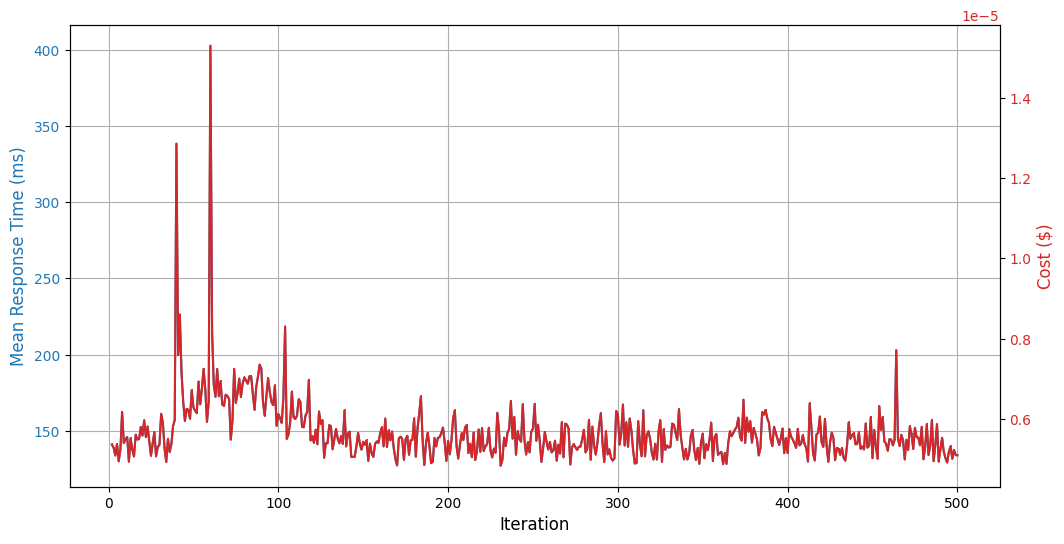

In [7]:
csv_files_auto = glob.glob("./data/auto/*response_times.csv")

dfs = [pd.read_csv(file, usecols=["response_time_ms"]) for file in csv_files_auto]

combined_auto = pd.concat(dfs, axis=1)
combined_auto.columns = [f"run_{i + 1}" for i in range(len(dfs))]

combined_auto.head()

row_means = pd.DataFrame({
    "iteration": range(1, len(combined_auto) + 1),
    "mean_response_time": combined_auto.mean(axis=1).values
})

row_means["response_time_s"] = row_means["mean_response_time"] / 1000


response_time_sum_auto = row_means.mean(axis=1).sum() / 1000

# remove first row (cold start) for better visualization
row_means = row_means.iloc[1:]

# assign rates
cpu_rate = 0.000038  # per second
gpu_rate = 0.000133  # per second

# calculate cost
row_means["cost"] = row_means.apply(
    lambda row: row["response_time_s"] * cpu_rate,
    axis=1
)

# plot with iteration on x axis and mean_response_time on y axis
# First y-axis: response time
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(row_means["iteration"], row_means["mean_response_time"], color="tab:blue", marker=',')
ax1.set_xlabel("Iteration", fontsize=12)
ax1.set_ylabel("Mean Response Time (ms)", fontsize=12, color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.grid(True)

# Second y-axis: cost
ax2 = ax1.twinx()
ax2.plot(row_means["iteration"], row_means["cost"], color="tab:red", marker=',')
ax2.set_ylabel("Cost ($)", fontsize=12, color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red")

plt.show()


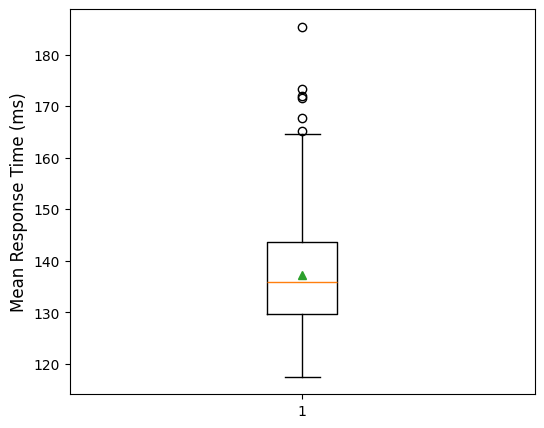

In [4]:
# GPU Boxplot
csv_files_gpu = glob.glob("./data/gpu/*response_times.csv")

dfs = [pd.read_csv(file, usecols=["response_time_ms"]) for file in csv_files_gpu]

combined_gpu = pd.concat(dfs, axis=1)
combined_gpu.columns = [f"run_{i + 1}" for i in range(len(dfs))]

response_time_sum_gpu = combined_gpu.mean(axis=1).sum() / 1000

# Compute row means, skipping the first row (cold start)
row_means_without_coldstart_gpu = combined_gpu.iloc[1:].mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(row_means_without_coldstart_gpu, showmeans=True)

# plt.title("Boxplot of Mean Response Times per Request (without cold start)", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

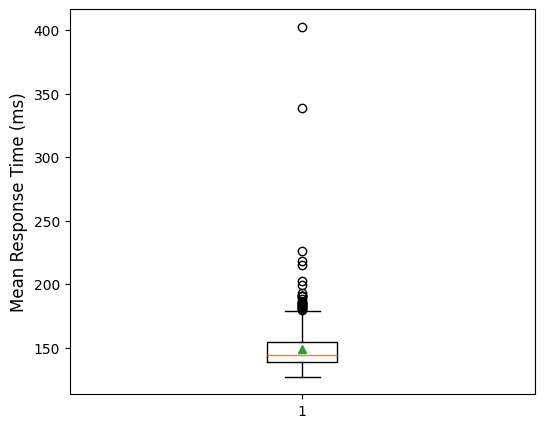

In [6]:
# Auto Boxplot
csv_files_auto = glob.glob("./data/auto/*response_times.csv")

dfs_auto = [pd.read_csv(file, usecols=["response_time_ms"]) for file in csv_files_auto]

combined_auto = pd.concat(dfs_auto, axis=1)
combined_auto.columns = [f"run_{i + 1}" for i in range(len(dfs_auto))]

combined_auto.head()


# Compute row means, skipping the first row (cold start)
row_means_without_coldstart_auto = combined_auto.iloc[1:].mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(row_means_without_coldstart_auto, showmeans=True)

# Add title and labels
# plt.title("Boxplot of Mean Response Times per Request (without cold start)", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

97.56342919861476
110.90439939498901
[np.float64(0.01475028511953354), np.float64(0.003707410309547361)]


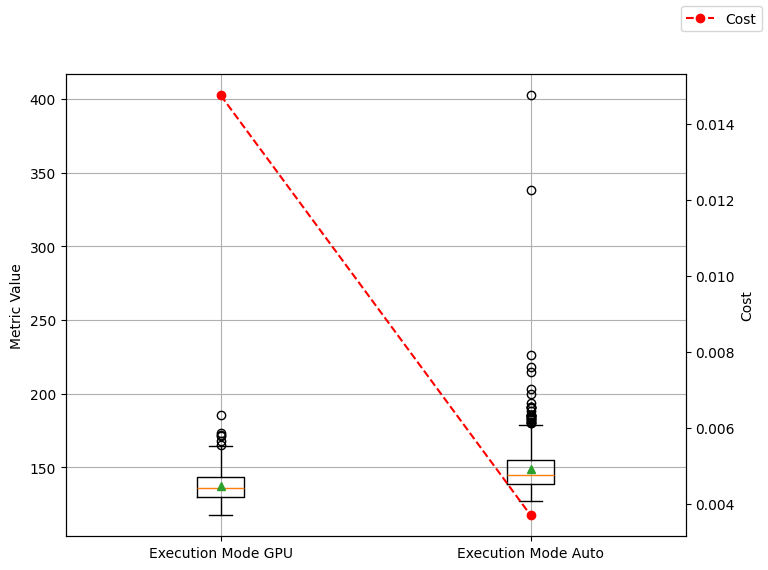

In [8]:
# Combine both CPU and GPU data for comparison

data = [row_means_without_coldstart_gpu, row_means_without_coldstart_auto]

fig, ax1 = plt.subplots(figsize=(8,6))

# Boxplots on left y-axis
ax1.boxplot(
    data,
    tick_labels=["Execution Mode GPU", "Execution Mode Auto"],
    showmeans=True
)
ax1.set_ylabel("Metric Value")


auto_seconds = response_time_sum_auto + 30
gpu_seconds = response_time_sum_gpu + 30

print(auto_seconds)
print(gpu_seconds)


costs = [gpu_seconds*gpu_rate, auto_seconds*cpu_rate]

print(costs)

positions = [1, 2]

# Add a second axis for costs
ax2 = ax1.twinx()
# positions = [1, 2, 3]
ax2.plot(positions, costs, "ro--", label="Cost")  # red dotted line with markers
ax2.set_ylabel("Cost")

ax1.grid(True)
fig.legend()
plt.show()


In [10]:
# Calculate and print summary statistics

# mean of first values
auto_coldstart = combined_auto.iloc[0].mean()
gpu_coldstart = combined_gpu.iloc[0].mean()


print(f"Auto Cold Start Mean: {auto_coldstart:.2f} ms")
print(f"GPU Cold Start Mean: {gpu_coldstart:.2f} ms")

Auto Cold Start Mean: 2932.61 ms
GPU Cold Start Mean: 12433.15 ms
